### Dependencies

In [2]:
%pip install matplotlib
%pip install scikit-learn
%pip install pyod

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import matplotlib.pyplot as plt
import sklearn.metrics
from pyod.utils.data import generate_data
from pyod.models.knn import KNN
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import numpy as np
from sklearn.metrics import balanced_accuracy_score

### Exercise 1

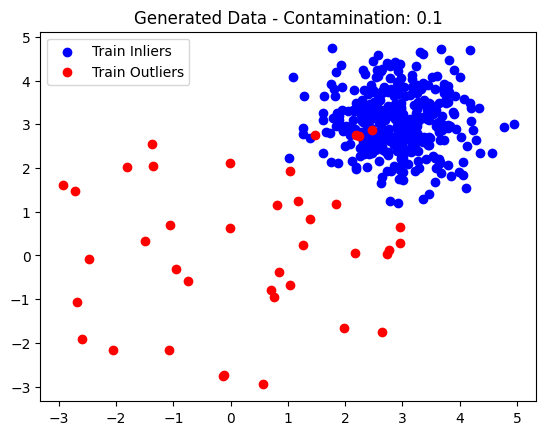

In [4]:
def ex1(contamination):
    data = generate_data(n_train=400, n_test=100, n_features=2, contamination=contamination, random_state=23)
    train_data, test_data, train_labels, test_labels = data

    train_inliers = train_data[train_labels == 0]
    train_outliers = train_data[train_labels == 1]

    plt.scatter(train_inliers[:, 0], train_inliers[:, 1], c='blue', label='Train Inliers')
    plt.scatter(train_outliers[:, 0], train_outliers[:, 1], c='red', label='Train Outliers')
    plt.title(f'Generated Data - Contamination: {contamination}')
    plt.legend()

    plt.show()

    return train_data, test_data, train_labels, test_labels


train_data, test_data, train_labels, test_labels = ex1(contamination=0.1)

### Exercise 2

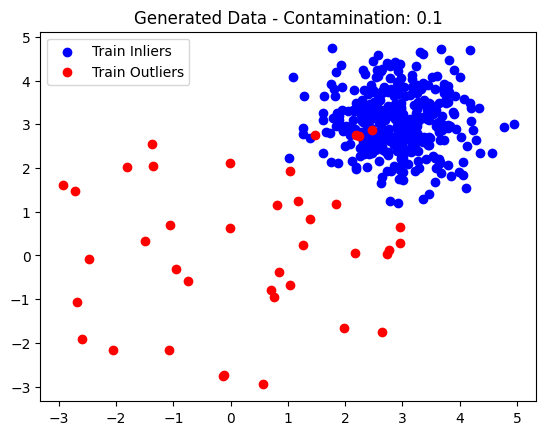

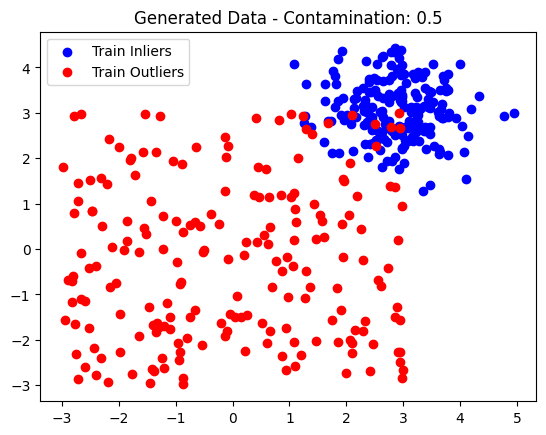

Exercise 2 - Contamination: 0.1
TN:  89
TP:  10
FN:  0
FP:  1
Balanced Accuracy: 0.99


c:\Master\Homework-Anomaly-Detection-AD\Laboratories\.venv\Lib\site-packages\pyod\models\base.py:554: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


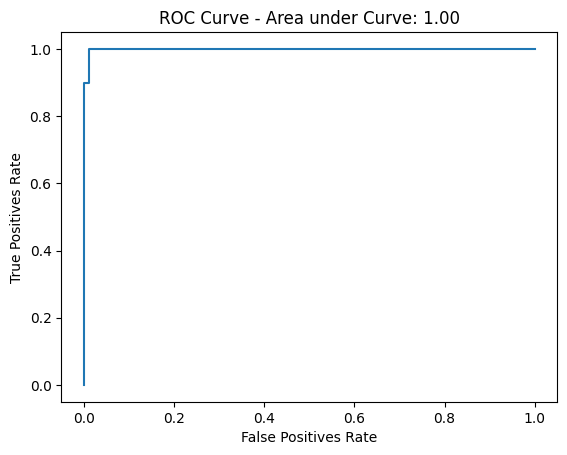

c:\Master\Homework-Anomaly-Detection-AD\Laboratories\.venv\Lib\site-packages\pyod\models\base.py:554: UserWarning: y should not be presented in unsupervised learning.
  warnings.warn(


Exercise 2 - Contamination: 0.5
TN:  40
TP:  43
FN:  7
FP:  10
Balanced Accuracy: 0.83


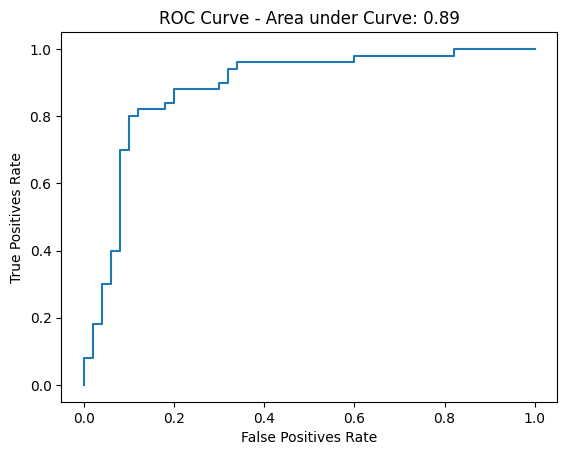

In [5]:
def ex2(train_data, test_data, train_labels, test_labels, contamination):
    knn = KNN(contamination=contamination)

    knn.fit(train_data, train_labels)

    train_predictions = knn.predict(train_data)
    test_predictions = knn.predict(test_data)

    train_confusion_matrix = confusion_matrix(train_labels, train_predictions)
    test_confusion_matrix = confusion_matrix(test_labels, test_predictions)

    true_negatives = test_confusion_matrix[0, 0]
    true_positives = test_confusion_matrix[1, 1]
    false_negatives = test_confusion_matrix[1, 0]
    false_positives = test_confusion_matrix[0, 1]

    print(f'Exercise 2 - Contamination: {contamination}')
    print('TN: ', true_negatives)
    print('TP: ', true_positives)
    print('FN: ', false_negatives)
    print('FP: ', false_positives)

    true_positives_rate = true_positives / (true_positives + false_negatives)
    true_negatives_rate = true_negatives / (true_negatives + false_positives)

    balanced_accuracy = (true_positives_rate + true_negatives_rate) / 2

    print(f'Balanced Accuracy: {balanced_accuracy:.2f}')

    test_scores = knn.decision_function(test_data)
    false_positives_rate, true_positives_rate, thresholds = roc_curve(test_labels, test_scores)
    area_under_curve = auc(false_positives_rate, true_positives_rate)

    plt.plot(false_positives_rate, true_positives_rate)
    plt.xlabel('False Positives Rate')
    plt.ylabel('True Positives Rate')
    plt.title(f'ROC Curve - Area under Curve: {area_under_curve:.2f}')
    plt.show()


contamination_0 = 0.1
train_data_0, test_data_0, train_labels_0, test_labels_0 = ex1(contamination=contamination_0)

contamination_1 = 0.5
train_data_1, test_data_1, train_labels_1, test_labels_1 = ex1(contamination=contamination_1)

ex2(train_data_0, test_data_0, train_labels_0, test_labels_0, contamination_0)
ex2(train_data_1, test_data_1, train_labels_1, test_labels_1, contamination_1)

### Conclusion:
We see a slight decrease in performance (balanced accuracy, area under curve) when the contamination rate has been increased from initial value of 0.1. There were more false negatives and false positives.

### Exercise 3

In [6]:
def ex3(contamination):
    data = generate_data(n_train=1000, n_test=0, n_features=1, contamination=contamination, random_state=23)
    train_data, _, train_labels, _ = data

    z_scores = np.abs((train_data - np.mean(train_data))) / np.std(train_data)

    threshold = np.quantile(z_scores, 1.0 - contamination)

    predictions = (z_scores > threshold).astype(int)
    inliers = train_data[predictions == 0]
    outliers = train_data[predictions == 1]

    balanced_accuracy = balanced_accuracy_score(train_labels, predictions)
    print(f'Balanced Accuracy: {balanced_accuracy:.2f}')


ex3(contamination=0.1)

Balanced Accuracy: 0.82


### Exercise 4

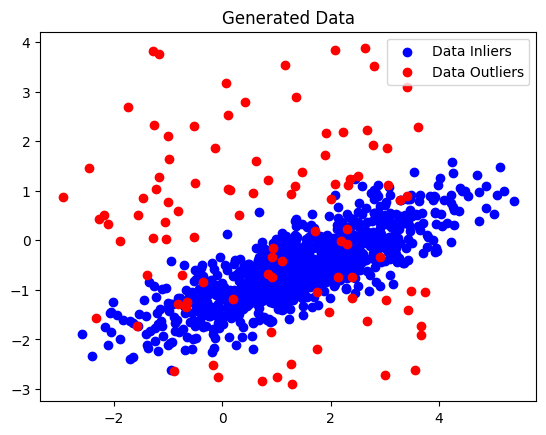

Balanced Accuracy: 0.64


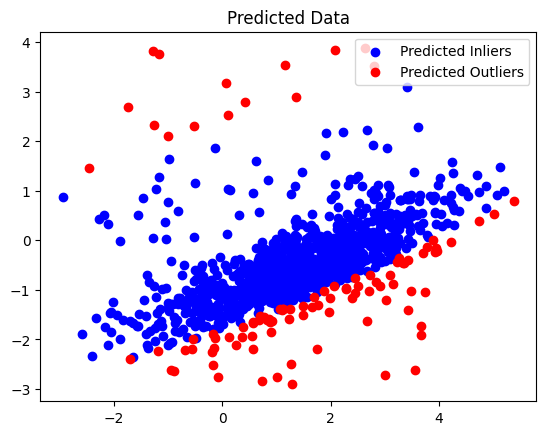

In [7]:
def ex4():
    num_dims = 2
    mean_inliers = np.array([1.5, -0.5])
    covariance = np.array([[2.0, 0.8], [0.8, 0.5]])

    num_samples = 1000
    contamination = 0.1

    num_inliers = int(num_samples * (1.0 - contamination))
    num_outliers = num_samples - num_inliers

    np.random.seed(23)

    inliers = np.random.multivariate_normal(np.zeros(num_dims), np.eye(num_dims), num_inliers)
    L = np.linalg.cholesky(covariance)
    inliers = mean_inliers + inliers @ L.T

    outliers = np.random.uniform(low=-3, high=4, size=(num_outliers, num_dims))

    data = np.vstack((inliers, outliers))
    labels = np.hstack((np.zeros(num_inliers), np.ones(num_outliers)))

    plt.scatter(inliers[:, 0], inliers[:, 1], c='blue', label='Data Inliers')
    plt.scatter(outliers[:, 0], outliers[:, 1], c='red', label='Data Outliers')
    plt.title('Generated Data')
    plt.legend()

    plt.show()

    x = data - np.mean(data)
    y = np.linalg.solve(L, x.T) # shape (num_dims, num_samples)

    z_scores = np.sqrt(np.sum(y**2, axis=0)) # shape (num_samples,), colapsam num_dims

    threshold = np.quantile(z_scores, 1.0 - contamination)

    predictions = (z_scores > threshold).astype(int)
    predicted_inliers = data[predictions == 0]
    predicted_outliers = data[predictions == 1]

    balanced_accuracy = balanced_accuracy_score(labels, predictions)
    print(f'Balanced Accuracy: {balanced_accuracy:.2f}')

    plt.scatter(predicted_inliers[:, 0], predicted_inliers[:, 1], c='blue', label='Predicted Inliers')
    plt.scatter(predicted_outliers[:, 0], predicted_outliers[:, 1], c='red', label='Predicted Outliers')
    plt.title('Predicted Data')
    plt.legend()

    plt.show()


ex4()